In [1]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

# Load the dataset
file_path = './data.csv'
data = pd.read_csv(file_path)

data = data[data['patient_id'] != 284]


# Isolating gene expression columns: typically, these would not end with '_mut' and would not be one of the known clinical feature columns.
clinical_features = [
    'patient_id', 'age_at_diagnosis', 'type_of_breast_surgery', 'cancer_type',
    'cancer_type_detailed', 'cellularity', 'chemotherapy', 'pam50_+_claudin-low_subtype',
    'cohort', 'er_status_measured_by_ihc', 'er_status', 'neoplasm_histologic_grade',
    'her2_status_measured_by_snp6', 'her2_status', 'tumor_other_histologic_subtype',
    'hormone_therapy', 'inferred_menopausal_state', 'integrative_cluster',
    'primary_tumor_laterality', 'lymph_nodes_examined_positive', 'mutation_count',
    'nottingham_prognostic_index', 'oncotree_code', 'overall_survival_months',
    'overall_survival', 'pr_status', 'radio_therapy', '3-gene_classifier_subtype',
    'tumor_size', 'tumor_stage', 'death_from_cancer'
]

# We'll define gene expression columns as those which are not clinical features and do not end with '_mut'
gene_expression_columns = [col for col in data.columns if col not in clinical_features and not col.endswith('_mut')]

# Display the first few gene expression column names to verify
gene_expression_columns[:10]

/var/folders/m1/x3kdm7_d40x9f988mnh9pc2r0000gp/T/ipykernel_18828/957392052.py:7: DtypeWarning: Columns (678,688,690,692) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


['brca1',
 'brca2',
 'palb2',
 'pten',
 'tp53',
 'atm',
 'cdh1',
 'chek2',
 'nbn',
 'nf1']

In [2]:
data['overall_survival'] = data['overall_survival'].apply(lambda x: 0 if x == 1 else 1)

In [3]:
alive = data[data['overall_survival'] == 0][gene_expression_columns]
deceased = data[data['overall_survival'] == 1][gene_expression_columns]

alive



,brca1,brca2,palb2,pten,tp53,atm,cdh1,chek2,nbn,nf1,...,srd5a1,srd5a2,srd5a3,st7,star,tnk2,tulp4,ugt2b15,ugt2b17,ugt2b7
0,-1.3990,-0.5738,-1.6217,1.4524,0.3504,1.1517,0.0348,0.1266,-0.8361,-0.8578,...,-1.1877,-0.0194,-1.6345,-0.2142,-0.5698,-1.1741,-1.4779,-0.5954,-0.8847,-0.3354
1,-1.3800,0.2777,-1.2154,0.5296,-0.0136,-0.2659,1.3594,0.7961,0.5419,-2.6059,...,-0.4412,0.4534,0.4068,0.7634,0.0231,0.9121,-0.9538,-0.2264,0.5398,-0.8920
3,0.6744,-0.5428,-1.6592,0.6369,1.6708,-0.8880,1.2491,-1.1889,-0.4174,-0.6165,...,-0.5630,-0.7078,0.8228,0.6819,-0.1948,-2.3286,-0.9924,-0.3154,0.2320,-0.4828
6,0.2671,0.4129,-1.3333,0.7834,-0.5109,0.8859,-0.2009,1.0128,-0.0697,-0.6300,...,-1.3151,0.0917,1.6814,2.2495,-1.6522,-3.4775,-0.4892,1.1938,-0.1027,0.4331
11,1.0828,2.9681,-1.3904,1.4090,-1.9730,-0.1959,0.0172,0.4615,1.0712,-1.2031,...,-1.6839,1.7474,2.2973,1.3225,-1.0065,-3.7085,0.8851,6.4704,12.6439,1.0881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1882,-0.7626,-1.1815,0.5210,1.4668,0.9927,-1.0672,0.4086,-0.8070,-1.5971,0.8849,...,-0.4793,-0.3396,-0.5609,0.7928,0.0005,-0.9162,1.3772,1.6405,0.7373,3.2844
1883,-0.5273,0.7333,0.7416,0.8066,0.1746,-0.4951,-0.1956,0.1595,0.0624,0.5289,...,-0.5901,-0.6755,-0.0297,2.0668,0.9297,-0.3367,0.0068,1.3679,1.8404,1.0758
1886,0.0868,-1.3231,-0.0001,-0.1903,-0.1598,-0.0732,0.7300,1.8625,-0.8137,-0.0735,...,-0.8907,-0.2620,-0.7565,0.1880,0.1695,-1.0741,-1.5059,-0.3028,-0.1456,-0.7035
1897,-1.0694,-0.1392,0.7629,0.2124,-1.0129,0.1732,0.4767,0.0841,-0.7502,-0.5602,...,-0.6217,-0.1064,0.5544,-0.1777,1.4395,-1.7915,-0.2462,-0.2934,0.1854,-0.6448


In [4]:

# Function to calculate log2 fold change and p-value for each gene
def calc_fold_change_and_pvalue(group1, group2):
    results = []
    for gene in gene_expression_columns:
        # Calculate mean expression in each group
        mean_group1 = np.mean(group1[gene])
        mean_group2 = np.mean(group2[gene])
        # Calculate log2 fold change
        fold_change = np.log2(mean_group1 + 1) - np.log2(mean_group2 + 1)
        # Conduct t-test
        t_stat, p_value = ttest_ind(group1[gene], group2[gene], nan_policy='omit')
        # Save the results
        results.append({'gene': gene, 'fold_change': fold_change, 'p_value': p_value})
    return pd.DataFrame(results)

# Calculate fold changes and p-values
de_results = calc_fold_change_and_pvalue(deceased, alive)

# Apply filtering criteria: fold change ≥ 1 and p-value ≤ 0.05
# Since we are looking at log2 fold change, a fold change of ≥ 1 is equivalent to log2 fold change of ≥ 0 (since log2(2)=1)
de_results_filtered = de_results[(np.abs(de_results['fold_change']) >= 0.4) & (de_results['p_value'] <= 0.000001)]

# Sort by p-value to see the most significant genes at the top
de_results_filtered_sorted = de_results_filtered.sort_values(by='p_value')

# Generate volcano plot data by converting p-values to -log10(p-value)
de_results_filtered_sorted['minus_log10_p_value'] = -np.log10(de_results_filtered_sorted['p_value'])

# Show the top differentially expressed genes
de_results_filtered_sorted

,gene,fold_change,p_value,minus_log10_p_value
451,hsd17b11,-0.618730,1.840893e-21,20.734971
437,cdkn2c,-0.563582,5.312657e-18,17.274688
47,jak1,-0.557732,1.198249e-17,16.921453
169,gsk3b,0.568549,2.578483e-16,15.588636
478,spry2,-0.528204,5.965433e-16,15.224358
358,lama2,-0.495244,3.657990e-14,13.436758
281,kmt2c,0.519716,5.462409e-14,13.262616
140,casp8,-0.483346,1.507548e-13,12.821729
268,tgfbr2,-0.476666,3.307218e-13,12.480537
301,map4,0.500019,4.504570e-13,12.346347


In [5]:
from lifelines import CoxPHFitter
significant_genes = de_results_filtered_sorted['gene'].tolist()

cox_data = data.dropna(subset=['overall_survival_months', 'overall_survival'] + significant_genes)

# Fill missing values in gene expression data with the mean (if any)
filled_gene_expression_data = cox_data[significant_genes].fillna(cox_data[significant_genes].mean())

# Combine the survival data with the filtered gene expression data
cox_data = pd.concat([cox_data[['overall_survival_months', 'overall_survival']], filled_gene_expression_data], axis=1)

# Instantiate the Cox Proportional Hazards model
cph = CoxPHFitter(penalizer=0.1, l1_ratio=1)

# Fit the model
cph.fit(cox_data, duration_col='overall_survival_months', event_col='overall_survival', show_progress=True)

# Display the summary of the Cox regression analysis
print(cph.summary)

Iteration 1: norm_delta = 3.99e-01, step_size = 0.9500, log_lik = -12814.43048, newton_decrement = 7.66e+01, seconds_since_start = 0.0
Iteration 2: norm_delta = 3.56e-02, step_size = 0.9500, log_lik = -11521.07090, newton_decrement = 9.86e-01, seconds_since_start = 0.1
Iteration 3: norm_delta = 3.55e-02, step_size = 0.9500, log_lik = -10586.98301, newton_decrement = 2.78e-01, seconds_since_start = 0.1
Iteration 4: norm_delta = 3.56e-02, step_size = 1.0000, log_lik = -9870.09612, newton_decrement = 3.38e-01, seconds_since_start = 0.2
Iteration 5: norm_delta = 3.55e-02, step_size = 0.9800, log_lik = -9319.71855, newton_decrement = 4.04e-01, seconds_since_start = 0.2
Iteration 6: norm_delta = 3.48e-02, step_size = 0.9604, log_lik = -8897.43191, newton_decrement = 4.72e-01, seconds_since_start = 0.2
Iteration 7: norm_delta = 3.15e-02, step_size = 1.0000, log_lik = -8573.60750, newton_decrement = 4.77e-01, seconds_since_start = 0.3
Iteration 8: norm_delta = 2.94e-02, step_size = 1.0000, log

Iteration 67: norm_delta = 8.86e-08, step_size = 0.9412, log_lik = -7536.53620, newton_decrement = 1.41e-06, seconds_since_start = 2.5
Convergence success after 67 iterations.
                   coef  exp(coef)  se(coef)  coef lower 95%  coef upper 95%  \
covariate                                                                      
hsd17b11  -3.839610e-08   1.000000  0.000021       -0.000042        0.000042   
cdkn2c    -6.580517e-08   1.000000  0.000034       -0.000067        0.000067   
jak1      -2.203919e-08   1.000000  0.000017       -0.000034        0.000034   
gsk3b      4.399368e-02   1.044976  0.031666       -0.018071        0.106059   
spry2     -2.124364e-04   0.999788  0.032791       -0.064482        0.064057   
lama2     -8.481102e-08   1.000000  0.000050       -0.000098        0.000098   
kmt2c      1.965817e-08   1.000000  0.000017       -0.000033        0.000033   
casp8     -1.747028e-08   1.000000  0.000017       -0.000033        0.000033   
tgfbr2    -2.636124e-08 

In [6]:
significant_genes

['hsd17b11',
 'cdkn2c',
 'jak1',
 'gsk3b',
 'spry2',
 'lama2',
 'kmt2c',
 'casp8',
 'tgfbr2',
 'map4',
 'abcb1',
 'kit',
 'tsc2',
 'pdgfra',
 'igf1',
 'tnk2',
 'myc',
 'stat5a',
 'smad4',
 'ccnd2',
 'rps6',
 'pdgfb',
 'jak2',
 'rheb',
 'ncoa3',
 'akt1']

In [7]:
from sklearn.model_selection import train_test_split
from lifelines import CoxPHFitter, KaplanMeierFitter
from lifelines.statistics import logrank_test

Iteration 1: norm_delta = 3.93e-01, step_size = 0.9500, log_lik = -9993.22180, newton_decrement = 5.74e+01, seconds_since_start = 0.0
Iteration 2: norm_delta = 3.32e-02, step_size = 0.9500, log_lik = -8962.46619, newton_decrement = 7.26e-01, seconds_since_start = 0.1
Iteration 3: norm_delta = 3.53e-02, step_size = 0.9500, log_lik = -8215.40187, newton_decrement = 2.19e-01, seconds_since_start = 0.1
Iteration 4: norm_delta = 3.79e-02, step_size = 0.9310, log_lik = -7642.01695, newton_decrement = 3.04e-01, seconds_since_start = 0.1
Iteration 5: norm_delta = 3.81e-02, step_size = 0.9124, log_lik = -7201.76292, newton_decrement = 3.68e-01, seconds_since_start = 0.2
Iteration 6: norm_delta = 3.74e-02, step_size = 0.8941, log_lik = -6863.93608, newton_decrement = 4.30e-01, seconds_since_start = 0.2
Iteration 7: norm_delta = 3.61e-02, step_size = 0.8762, log_lik = -6604.88888, newton_decrement = 4.91e-01, seconds_since_start = 0.2
Iteration 8: norm_delta = 2.92e-02, step_size = 1.0000, log_li

Iteration 64: norm_delta = 3.43e-07, step_size = 0.8858, log_lik = -5772.87864, newton_decrement = 3.22e-06, seconds_since_start = 2.0
Iteration 65: norm_delta = 4.49e-07, step_size = 1.0000, log_lik = -5772.87860, newton_decrement = 1.66e-06, seconds_since_start = 2.0
Iteration 66: norm_delta = 1.80e-07, step_size = 0.9800, log_lik = -5772.87857, newton_decrement = 2.42e-06, seconds_since_start = 2.1
Iteration 67: norm_delta = 8.56e-08, step_size = 0.9604, log_lik = -5772.87855, newton_decrement = 1.20e-06, seconds_since_start = 2.1
Convergence success after 67 iterations.
1500    0.947243
801     1.016984
1788    0.978714
893     1.066710
1232    1.032000
Name: risk_score, dtype: float64
Log-rank test p-value: 5.335171770986964e-07


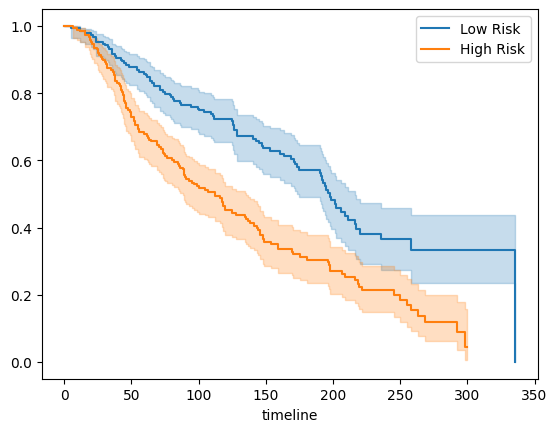

In [8]:
mRNA_data = data.dropna(subset=significant_genes + ['overall_survival_months', 'overall_survival'])

# Split the data into training and test sets (80% training, 20% test)
train, test = train_test_split(mRNA_data, test_size=0.2, random_state=11)
train_max = train['overall_survival_months'].max()
train_min = train['overall_survival_months'].min()
test_max = test['overall_survival_months'].max()
test_min = test['overall_survival_months'].min()
assert train_min <= test_min < test_max < train_max, \
    "time range or test data is not within time range of training data."

# Fit the Cox Proportional Hazards model on the training set
cph = CoxPHFitter(penalizer=0.1, l1_ratio=1)
cph.fit(train[significant_genes + ['overall_survival_months', 'overall_survival']], 
        duration_col='overall_survival_months', 
        event_col='overall_survival', 
        show_progress=True)


# Calculate risk scores for the training set based on the Cox model's coefficients
train['risk_score'] = cph.predict_partial_hazard(train[significant_genes])
# Find the median risk score as the cutoff for low/high risk
train_median_risk_score = train['risk_score'].median()
# Classify patients into low and high risk based on the median risk score
train['risk_group'] = np.where(train['risk_score'] <= train_median_risk_score, 'low', 'high')


# Perform the same calculation for the test set
test['risk_score'] = cph.predict_partial_hazard(test[significant_genes])
test_median_risk_score = test['risk_score'].median()
test['risk_group'] = np.where(test['risk_score'] <= test_median_risk_score, 'low', 'high')
print(test['risk_score'].head())

# Perform survival analysis
kmf = KaplanMeierFitter()

# Fit Kaplan-Meier estimator for low-risk group in the test set
kmf.fit(test[test['risk_group'] == 'low']['overall_survival_months'], 
        event_observed=test[test['risk_group'] == 'low']['overall_survival'], 
        label='Low Risk')
ax_kmf = kmf.plot_survival_function()

# Fit Kaplan-Meier estimator for high-risk group in the test set
kmf.fit(test[test['risk_group'] == 'high']['overall_survival_months'], 
        event_observed=test[test['risk_group'] == 'high']['overall_survival'], 
        label='High Risk')
kmf.plot_survival_function(ax=ax_kmf)

# Perform log-rank test between the two groups in the test set
results = logrank_test(
    test[test['risk_group'] == 'low']['overall_survival_months'],
    test[test['risk_group'] == 'high']['overall_survival_months'],
    event_observed_A=test[test['risk_group'] == 'low']['overall_survival'],
    event_observed_B=test[test['risk_group'] == 'high']['overall_survival']
)

print('Log-rank test p-value:', results.p_value)


In [9]:
from lifelines.utils import concordance_index
c_index = concordance_index(train['overall_survival_months'], train['risk_score'], train['overall_survival'])

print(f'C-index on test set: {c_index}')

C-index on test set: 0.4105088201456436


Time-dependent AUC at different time points: [0.61307705 0.61141859 0.66768199 0.65971293 0.63637647 0.6522745
 0.66045509 0.65348294 0.62730055 0.63194449 0.6253366  0.6464228
 0.64644526 0.65936107 0.66544871 0.66084396 0.65638433 0.65160986
 0.6497711  0.65886061 0.65569988 0.65531351 0.65531463 0.64580087
 0.64272258 0.64030446 0.64572576 0.65458335 0.64741664 0.65076156
 0.65259455 0.64919033 0.65565903 0.65247628 0.64667177 0.64883324
 0.65920332 0.66582402 0.66286192 0.65166504 0.64698163 0.64490711
 0.64744177 0.65194213 0.65639779 0.66169014 0.66568369 0.6708753
 0.67526624 0.67796705 0.67860152 0.67773674 0.67531415 0.67289048
 0.67180288 0.65791631 0.65109647 0.65206172 0.65401775 0.65758083
 0.64957034 0.64500804 0.62099204 0.61619535 0.62401412 0.60341212
 0.59910832 0.60288519 0.61038724 0.59089177 0.58911376 0.59695275
 0.60989989 0.60112869 0.60659793 0.61552892 0.61106754 0.59007936
 0.58115969 0.57062771 0.58393168 0.58393168 0.61804812 0.61804812
 0.60833785 0.623681

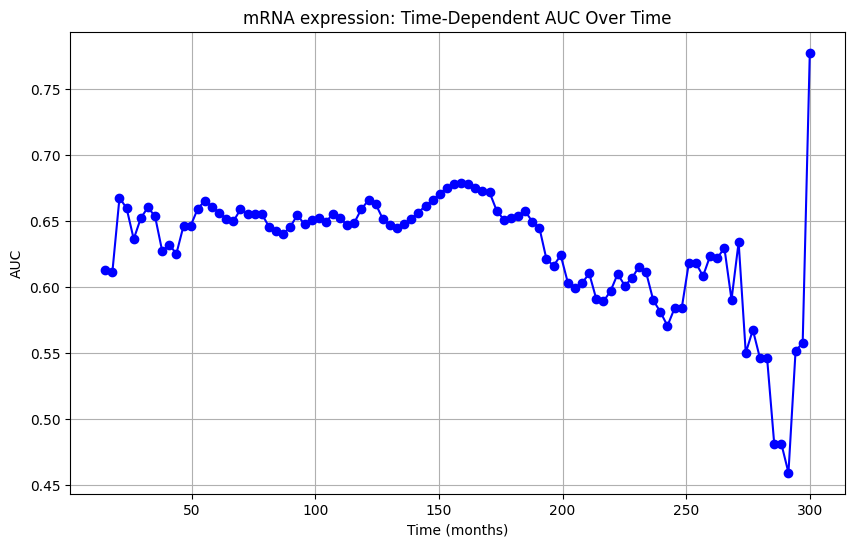

In [10]:
from sksurv.metrics import cumulative_dynamic_auc
from sksurv.util import Surv
import matplotlib.pyplot as plt

# Prepare the data for scikit-survival
Y_train = Surv.from_arrays(event=train['overall_survival'].astype(bool), 
                           time=train['overall_survival_months'])
Y_test = Surv.from_arrays(event=test['overall_survival'].astype(bool), 
                          time=test['overall_survival_months'])

# Predict using the model
risk_scores_test = cph.predict_partial_hazard(test[significant_genes]).values.flatten()

# Define time points for the evaluation
time_points = np.linspace(15, 300, 100)   # Adjusted as per your data's maximum observed time

# Calculate the time-dependent AUC
va_auc, va_mean_auc = cumulative_dynamic_auc(Y_train, Y_test, risk_scores_test, time_points)

print("Time-dependent AUC at different time points:", va_auc)
print("Mean Time-dependent AUC over all time points:", va_mean_auc)

# Plotting the time-dependent AUC
plt.figure(figsize=(10, 6))  # Set the figure size for better readability
plt.plot(time_points, va_auc, marker='o', linestyle='-', color='b')  # Blue line with circle markers

plt.title('mRNA expression: Time-Dependent AUC Over Time')
plt.xlabel('Time (months)')
plt.ylabel('AUC')
plt.grid(True)  # Add a grid for easier visualization of the values
plt.show()

In [11]:
columns_with_no_missing_values = data.notnull().all()

# To list the names of the columns without missing values
columns_without_missing = columns_with_no_missing_values[columns_with_no_missing_values].index.tolist()

In [12]:
non_missing_clinical_attributes = ['age_at_diagnosis', 'cancer_type', 'chemotherapy', 'pam50_+_claudin-low_subtype', 'cohort', 'er_status', 'her2_status_measured_by_snp6', 'her2_status', 'hormone_therapy', 'inferred_menopausal_state', 'integrative_cluster', 'lymph_nodes_examined_positive', 'nottingham_prognostic_index', 'overall_survival', 'overall_survival_months']

clinical_data = data[non_missing_clinical_attributes]
mRNA_expressions = data[significant_genes]
features = pd.concat([clinical_data, mRNA_expressions], axis=1)
features = pd.get_dummies(features, drop_first=True)
#features = pd.get_dummies(clinical_data, drop_first=True)

In [13]:
features
# Run on both clinical & mRNA data

,age_at_diagnosis,chemotherapy,cohort,hormone_therapy,lymph_nodes_examined_positive,nottingham_prognostic_index,overall_survival,overall_survival_months,hsd17b11,cdkn2c,...,integrative_cluster_10,integrative_cluster_2,integrative_cluster_3,integrative_cluster_4ER+,integrative_cluster_4ER-,integrative_cluster_5,integrative_cluster_6,integrative_cluster_7,integrative_cluster_8,integrative_cluster_9
0,75.65,0,1.0,1,10.0,6.044,0,140.500000,1.6822,6.4965,...,False,False,False,True,False,False,False,False,False,False
1,43.19,0,1.0,1,0.0,4.020,0,84.633333,-0.7837,0.5189,...,False,False,False,True,False,False,False,False,False,False
2,48.87,1,1.0,1,1.0,4.030,1,163.700000,1.6822,1.1287,...,False,False,True,False,False,False,False,False,False,False
3,47.68,1,1.0,1,3.0,4.050,0,164.933333,1.4099,0.2592,...,False,False,False,False,False,False,False,False,False,True
4,76.97,1,1.0,1,8.0,6.080,1,41.366667,0.0493,2.6149,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,43.10,0,4.0,1,1.0,5.050,0,196.866667,1.5955,1.0972,...,False,False,True,False,False,False,False,False,False,False
1900,42.88,0,4.0,0,1.0,5.040,1,44.733333,0.2741,-0.1845,...,False,False,False,False,False,True,False,False,False,False
1901,62.90,0,4.0,1,45.0,6.050,1,175.966667,0.3877,1.0649,...,False,False,False,False,False,False,False,False,False,False
1902,61.16,0,4.0,1,12.0,5.050,1,86.233333,0.6109,0.1786,...,False,False,False,False,False,False,False,False,False,False


Iteration 1: norm_delta = 9.70e-01, step_size = 0.9500, log_lik = -5908.13686, newton_decrement = 2.06e+02, seconds_since_start = 0.0
Iteration 2: norm_delta = 2.06e-01, step_size = 0.9500, log_lik = -5761.05610, newton_decrement = 3.15e+01, seconds_since_start = 0.1
Iteration 3: norm_delta = 8.79e-02, step_size = 0.9500, log_lik = -5724.99101, newton_decrement = 5.59e+00, seconds_since_start = 0.1
Iteration 4: norm_delta = 3.44e-02, step_size = 1.0000, log_lik = -5718.53858, newton_decrement = 4.53e-01, seconds_since_start = 0.2
Iteration 5: norm_delta = 3.34e-03, step_size = 1.0000, log_lik = -5718.06078, newton_decrement = 3.64e-03, seconds_since_start = 0.2
Iteration 6: norm_delta = 2.71e-05, step_size = 1.0000, log_lik = -5718.05712, newton_decrement = 2.42e-07, seconds_since_start = 0.2
Iteration 7: norm_delta = 1.79e-09, step_size = 1.0000, log_lik = -5718.05712, newton_decrement = 1.08e-15, seconds_since_start = 0.3
Convergence success after 7 iterations.
Time-dependent AUC at 

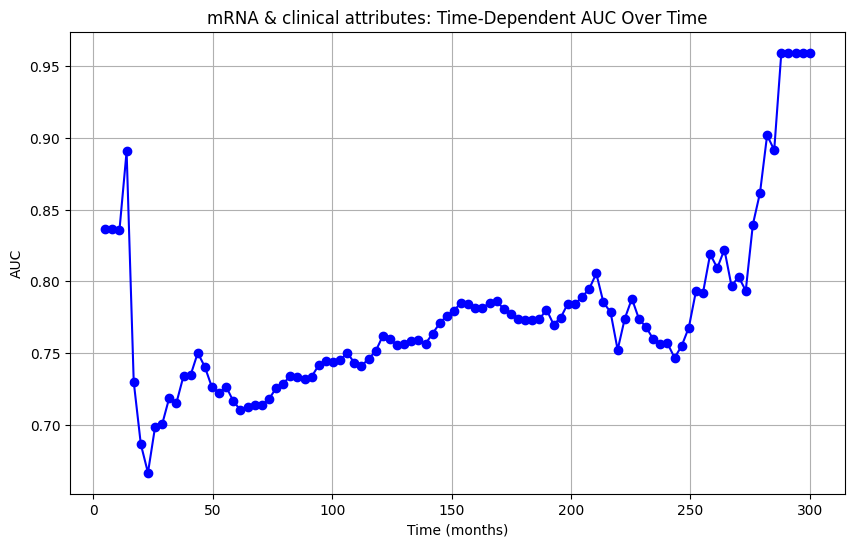

In [14]:
train_features, test_features = train_test_split(features, test_size=0.2, random_state=2)

# Ensure to include only the features, excluding 'overall_survival_months' and 'overall_survival'
train_X = train_features.drop(['overall_survival_months', 'overall_survival'], axis=1)
test_X = test_features.drop(['overall_survival_months', 'overall_survival'], axis=1)

# Separate the survival data
train_Y = Surv.from_arrays(event=train_features['overall_survival'].astype(bool), 
                           time=train_features['overall_survival_months'])
test_Y = Surv.from_arrays(event=test_features['overall_survival'].astype(bool), 
                          time=test_features['overall_survival_months'])

cph = CoxPHFitter()
cph.fit(train_features, duration_col='overall_survival_months', event_col='overall_survival', show_progress=True)

test_features['predicted_risk'] = cph.predict_partial_hazard(test_X)

# Define time points where you want to calculate the AUC
time_points = np.linspace(5, 300, 100)

# Calculate time-dependent AUC using test data
va_auc, va_mean_auc = cumulative_dynamic_auc(train_Y, test_Y, test_features['predicted_risk'], time_points)

print("Time-dependent AUC at different time points:", va_auc)
print("Mean Time-dependent AUC over all time points:", va_mean_auc)

# Plotting the time-dependent AUC
plt.figure(figsize=(10, 6))  # Set the figure size for better readability
plt.plot(time_points, va_auc, marker='o', linestyle='-', color='b')  # Blue line with circle markers

plt.title('mRNA & clinical attributes: Time-Dependent AUC Over Time')
plt.xlabel('Time (months)')
plt.ylabel('AUC')
plt.grid(True)  # Add a grid for easier visualization of the values
plt.show()

In [15]:
### Only clinical attributes

In [16]:
clinical_features = pd.get_dummies(clinical_data, drop_first=True)
train_clinical_features, test_clinical_features = train_test_split(clinical_features, test_size=0.2, random_state=2)

# Ensure to include only the features, excluding 'overall_survival_months' and 'overall_survival'
train_X = train_clinical_features.drop(['overall_survival_months', 'overall_survival'], axis=1)
test_X = test_clinical_features.drop(['overall_survival_months', 'overall_survival'], axis=1)

# Separate the survival data
train_Y = Surv.from_arrays(event=train_clinical_features['overall_survival'].astype(bool), 
                           time=train_clinical_features['overall_survival_months'])
test_Y = Surv.from_arrays(event=test_clinical_features['overall_survival'].astype(bool), 
                          time=test_clinical_features['overall_survival_months'])

cph = CoxPHFitter()
cph.fit(train_clinical_features, duration_col='overall_survival_months', event_col='overall_survival', show_progress=True)


Iteration 1: norm_delta = 9.05e-01, step_size = 0.9500, log_lik = -5908.13686, newton_decrement = 1.77e+02, seconds_since_start = 0.0
Iteration 2: norm_delta = 1.81e-01, step_size = 0.9500, log_lik = -5798.04726, newton_decrement = 3.40e+01, seconds_since_start = 0.1
Iteration 3: norm_delta = 9.58e-02, step_size = 0.9500, log_lik = -5758.60597, newton_decrement = 6.70e+00, seconds_since_start = 0.1
Iteration 4: norm_delta = 3.86e-02, step_size = 1.0000, log_lik = -5750.85077, newton_decrement = 5.74e-01, seconds_since_start = 0.1
Iteration 5: norm_delta = 3.98e-03, step_size = 1.0000, log_lik = -5750.24228, newton_decrement = 5.33e-03, seconds_since_start = 0.2
Iteration 6: norm_delta = 3.74e-05, step_size = 1.0000, log_lik = -5750.23692, newton_decrement = 4.84e-07, seconds_since_start = 0.2
Iteration 7: norm_delta = 3.38e-09, step_size = 1.0000, log_lik = -5750.23692, newton_decrement = 4.00e-15, seconds_since_start = 0.2
Convergence success after 7 iterations.


<lifelines.CoxPHFitter: fitted with 1522 total observations, 626 right-censored observations>

Time-dependent AUC at different time points: [0.87232902 0.87232902 0.87198856 0.91456475 0.7271157  0.69479866
 0.66103657 0.68522912 0.68721922 0.71489997 0.70969369 0.72187339
 0.72027687 0.74679901 0.74084373 0.72927124 0.72909961 0.73423794
 0.71914566 0.7197351  0.72587849 0.73229263 0.73229263 0.73345449
 0.73242742 0.73466903 0.74064523 0.74587103 0.74039089 0.74372155
 0.75150123 0.75410456 0.76257015 0.76197416 0.76630043 0.75785412
 0.75576987 0.7616209  0.76692975 0.77646898 0.77836531 0.77649028
 0.77540177 0.77648947 0.7755912  0.77075564 0.77487814 0.78449403
 0.78832145 0.79519866 0.80056398 0.79971151 0.80117349 0.80117349
 0.80319532 0.80694065 0.80228657 0.80183548 0.80233052 0.80171087
 0.80091033 0.79962179 0.80384521 0.79776751 0.80949178 0.81421411
 0.81610909 0.8257795  0.8322117  0.83634354 0.82130362 0.81823052
 0.80081738 0.81438277 0.82527595 0.81359742 0.80867069 0.80406825
 0.80158485 0.80822275 0.80061643 0.80570276 0.81602511 0.8411395
 0.83314698 0.8624

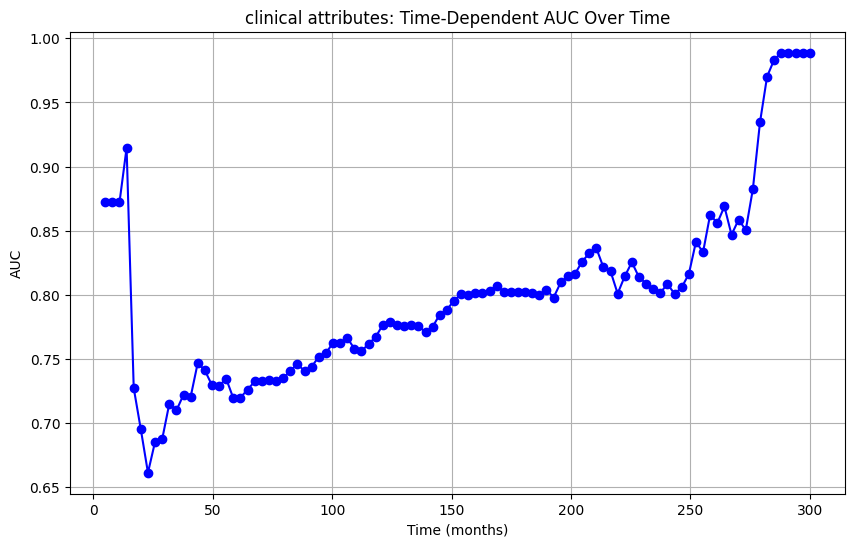

In [17]:
test_clinical_features['predicted_risk'] = cph.predict_partial_hazard(test_X)

# Define time points where you want to calculate the AUC
time_points = np.linspace(5, 300, 100)

# Calculate time-dependent AUC using test data
va_auc, va_mean_auc = cumulative_dynamic_auc(train_Y, test_Y, test_clinical_features['predicted_risk'], time_points)

print("Time-dependent AUC at different time points:", va_auc)
print("Mean Time-dependent AUC over all time points:", va_mean_auc)

# Plotting the time-dependent AUC
plt.figure(figsize=(10, 6))  # Set the figure size for better readability
plt.plot(time_points, va_auc, marker='o', linestyle='-', color='b')  # Blue line with circle markers

plt.title('clinical attributes: Time-Dependent AUC Over Time')
plt.xlabel('Time (months)')
plt.ylabel('AUC')
plt.grid(True)  # Add a grid for easier visualization of the values
plt.show()